<a href="https://colab.research.google.com/github/layann444/game-analytics-project/blob/main/dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


2025-05-21 20:18:04.136 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 20:18:04.835 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-21 20:18:04.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 20:18:04.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 20:18:04.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 20:18:04.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 20:18:04.945 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 20:18:04.949 Thread 'MainThread': mi

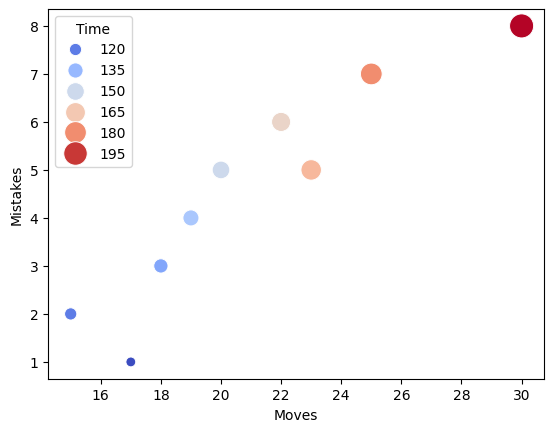

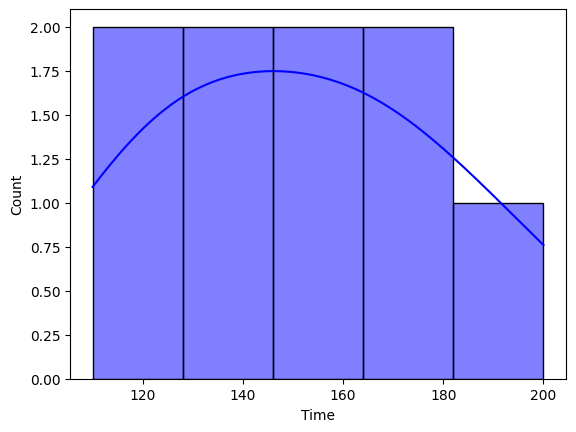

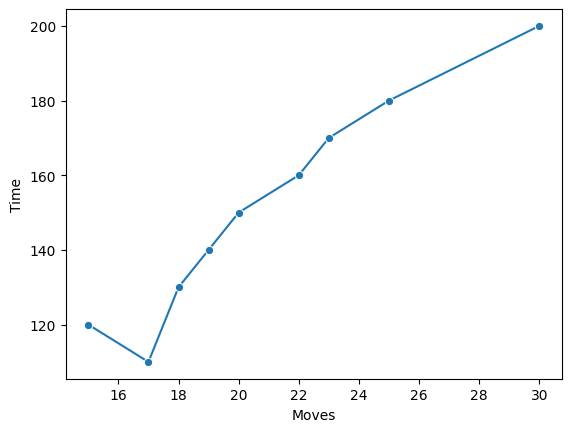

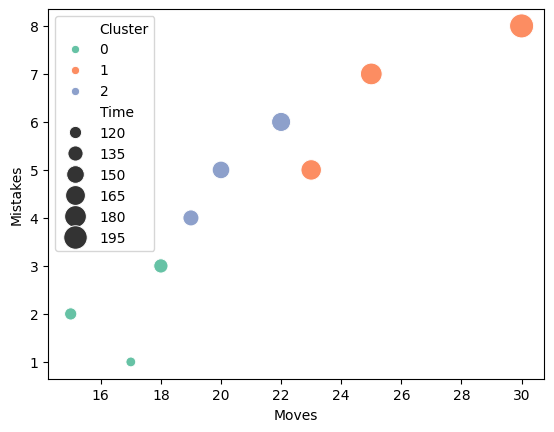

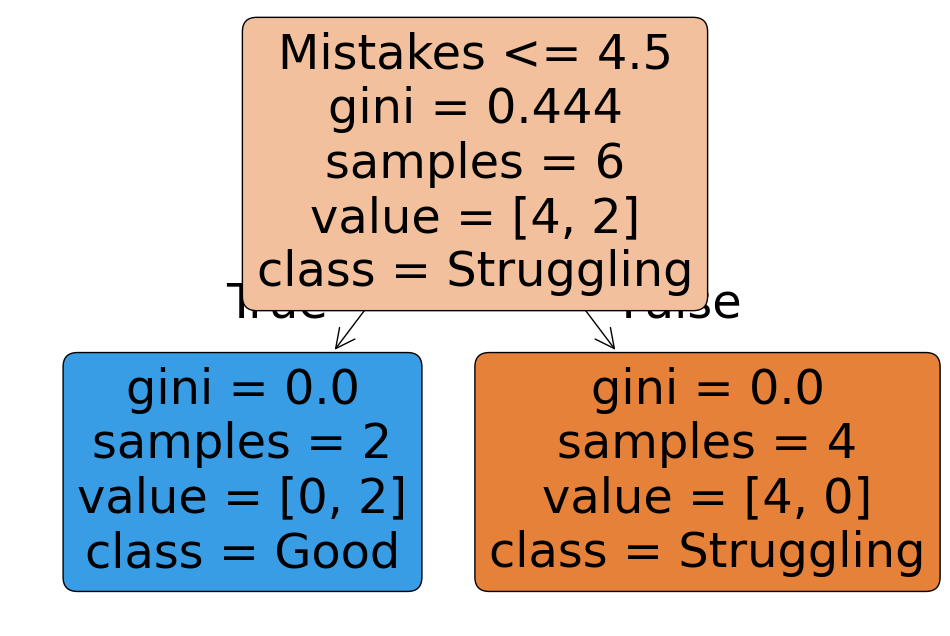

In [4]:
# سنحتاج إلى تحميل مكتبات مختلفة
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# إنشاء بيانات وهمية لـ 9 لاعبين
data = {
    'Player': ['Player 1', 'Player 2', 'Player 3', 'Player 4', 'Player 5',
               'Player 6', 'Player 7', 'Player 8', 'Player 9'],
    'Moves': [20, 15, 25, 18, 22, 30, 19, 17, 23],
    'Mistakes': [5, 2, 7, 3, 6, 8, 4, 1, 5],
    'Time': [150, 120, 180, 130, 160, 200, 140, 110, 170]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# تعريف دالة لعرض التوصيات
def generate_recommendations(cluster):
    if cluster == 0:
        return "Consider adding hints for players in this cluster."
    elif cluster == 1:
        return "Players in this cluster are struggling; reduce the difficulty."
    else:
        return "Keep the current game design, players in this cluster are performing well."

# إعداد الواجهة
st.title("Game Analytics Dashboard")

# عرض البيانات
st.subheader("Player Data")
st.write(df)

# عرض الرسومات البيانية
st.subheader("Moves vs Mistakes vs Time")
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Moves", y="Mistakes", hue="Time", palette="coolwarm", size="Time", sizes=(50, 300), ax=ax)
st.pyplot(fig)

# توزيع الوقت المستغرق
st.subheader("Distribution of Time Taken by Players")
fig, ax = plt.subplots()
sns.histplot(df['Time'], kde=True, color='blue', ax=ax)
st.pyplot(fig)

# رسم العلاقة بين الحركات والوقت
st.subheader("Moves vs Time")
fig, ax = plt.subplots()
sns.lineplot(x="Moves", y="Time", data=df, marker="o", ax=ax)
st.pyplot(fig)

# تطبيق K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Moves', 'Mistakes', 'Time']])

st.subheader("Player Clusters using K-Means")
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Moves", y="Mistakes", hue="Cluster", palette="Set2", size="Time", sizes=(50, 300), ax=ax)
st.pyplot(fig)

# تطبيق Decision Tree
df['Label'] = (df['Mistakes'] < 5).astype(int)
X = df[['Moves', 'Mistakes', 'Time']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# التنبؤ باستخدام البيانات الاختبارية
y_pred = model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
st.subheader(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%")

# عرض شجرة القرار
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['Moves', 'Mistakes', 'Time'], class_names=['Struggling', 'Good'], rounded=True, ax=ax)
st.pyplot(fig)

# عرض التوصيات بناءً على التجميع
st.subheader("Recommendations for Players")
for i in range(len(df)):
    st.write(f"{df['Player'][i]}: {generate_recommendations(df['Cluster'][i])}")


In [5]:
%%writefile app.py
# (الصق الكود هنا كما هو)


Writing app.py


In [ ]:
!streamlit run app.py &
!streamlit hello





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.79.131:8501

